# Task 1

In [1]:
import numpy as np

We are using a GROMOS type force field here which splits the potential for dihedral angles into two contributions, proper and improper dihedrals. You can use this as a starting point for the worksheet. Note that below, only 2 of 4 bonded interaction terms are implemented.

In [2]:
# load parameters

# proper dihedrals
pd_i, pd_j, pd_k, pd_l, phi_0, k_phi, mult = np.loadtxt('dihedrals_proper.dat', unpack=True)
pdih = np.vstack((pd_i, 
                  pd_j,
                  pd_k,
                  pd_l)).T


# improper dihedrals
id_i, id_j, id_k, id_l, xsi_0, k_xsi = np.loadtxt('dihedrals_improper.dat', unpack=True)
idih = np.vstack((id_i, 
                  id_j,
                  id_k,
                  id_l)).T


# lennard jones and charges
charges, sigma_i, epsilon_i = np.loadtxt('non_bonded.dat', usecols=(1,2,3), unpack=True)

In [3]:
# define functions that represent the potential

def U_proper_dih_gmx(phi, mult, phi_0, k_phi):
    U = k_phi * (1. + np.cos(mult * phi - phi_0))
    return U

def U_improper_dih(xsi, xsi_0, k_xsi):
    U = .5 * k_xsi * (xsi - xsi_0)**2
    return U

Load parameters for angles and bonds. Define functions to calculate the 

In [17]:
#angles
a_i, a_j, a_k, theta_0, k_theta = np.loadtxt('angles.dat', unpack=True)

#bonds
b_i, b_j, r_0, k_b = np.loadtxt('bonds.dat',unpack=True)
print(a_i.size)
print(a_j.size)
print(theta_0.size)
print(k_theta.size)
print(r_0.size)

49
49
49
49
32


In [5]:
def U_angles(theta, theta_0, k_theta):
    U = 0.5*k_theta*(theta-theta_0)**2
    return U

def U_bonds(r, r_0, k_b):
    U = 0.5*k_b*(r-r_0)**2
    return U

In [6]:
import matplotlib.pyplot as plt

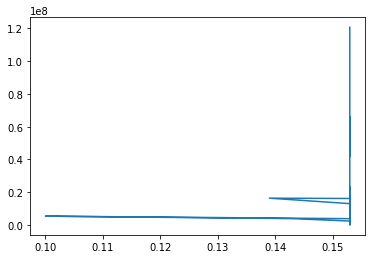

In [27]:
r = b_i 
#plt.plot(a_j, U_angles(theta_0, theta_0, k_theta))
plt.plot(r_0, U_bonds(r, r_0, k_b))